In [125]:
import tifffile
from matplotlib import pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [126]:
from skimage.filters import rank
from skimage.morphology import disk
import numpy as np

from cil.framework import ImageGeometry, AcquisitionGeometry, AcquisitionData
from cil.plugins.astra import ProjectionOperator
from cil.plugins.astra.processors import FBP
from copy import deepcopy

#%%
n_proj = 751
imsize = 2016

def reconstruct_one_slice(sino):
    # set-up ccpi objects
    # multi-channel geometry
    ag_MC = AcquisitionGeometry.create_Parallel2D()
    ag_MC.set_panel(sino.shape[2], pixel_size=0.055)
    ag_MC.set_channels(num_channels=2)
    ag_MC.set_angles(np.linspace(0, 180, n_proj, endpoint=False), angle_unit='degree')
    # allocate AcquisitionGeometry and fill it in with actual sinogram
    ad_MC = ag_MC.allocate()
    ad_MC.fill(sino)
    # generate ImagGeometry
    ig_MC = ag_MC.get_ImageGeometry()
    
    # actual projection operator for iterative reconstruction
    op_MC = ProjectionOperator(ig_MC, ag_MC, 'gpu')

    # single slice geometry
    ag = ag_MC.get_slice(channel=0)
    ig = ag.get_ImageGeometry()

    #%% FBP recon
    FBP_recon = ig_MC.allocate()

    # FBP reconstruction per channel
    for i in range(ig_MC.channels):

        FBP_recon_2D = FBP(ig, ag, 'gpu')(ad_MC.get_slice(channel=i))
        FBP_recon.fill(FBP_recon_2D, channel=i)

        print("Finish FBP recon for channel {}".format(i), end='\r')

    print("\nFBP Reconstruction Complete!")
    # get actual numpy array
    FBP_recon = FBP_recon.as_array()
    
    return FBP_recon


In [127]:
from scipy.signal import convolve2d
from skimage.morphology import diamond

footprint = np.array([[0, 1, 0], 
                      [1, 1, 1], 
                      [0, 1 ,0]])

mask = footprint / footprint.sum()

footprint_l = np.array(diamond(2))

mask_l = footprint_l / footprint_l.sum()

## Best validation inference on train

In [128]:
from skimage.segmentation import mark_boundaries

In [129]:
before = tifffile.imread('/mnt/data/denoising/xeno/reco/all_volumes/13.tif')
after = tifffile.imread('/mnt/data/denoising/xeno/reco/all_volumes_processed/13.tif')

In [133]:
i=300
s = 500
p_x, p_y = 1000, 1200

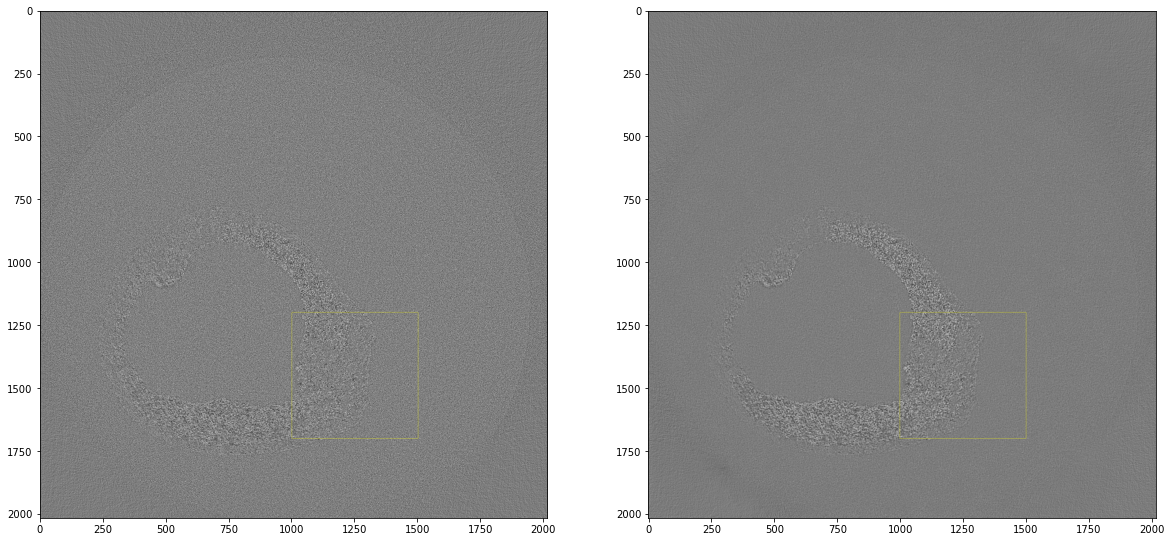

In [135]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))
segment = np.zeros(before[i].shape, dtype=np.uint8)
segment[p_y:p_y+s, p_x:p_x+s] = 1

ax1.imshow(mark_boundaries((before[i]+1)/2, segment))
ax2.imshow(mark_boundaries((after[i]+1)/2, segment))
plt.show()

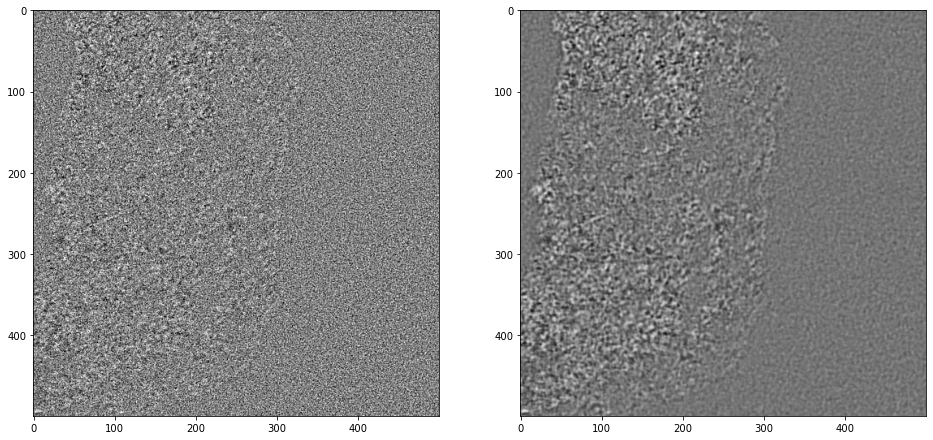

In [134]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 10))
ax1.imshow(before[i][p_y:p_y+s, p_x:p_x+s], cmap='gray')
ax2.imshow(after[i][p_y:p_y+s, p_x:p_x+s], cmap='gray')
plt.show()

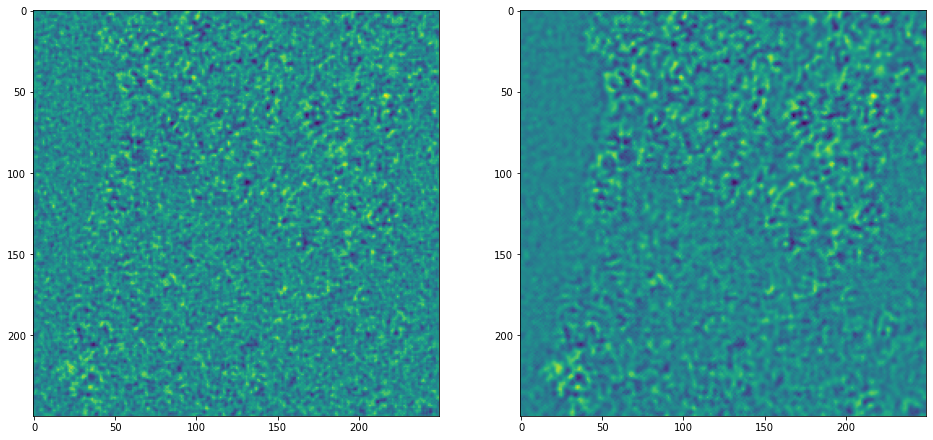

In [58]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 10))
ax1.imshow(convolve2d(before[i][p_y:p_y+s, p_x:p_x+s], mask, mode='same'))
ax2.imshow(after[i][p_y:p_y+s, p_x:p_x+s])
plt.show()

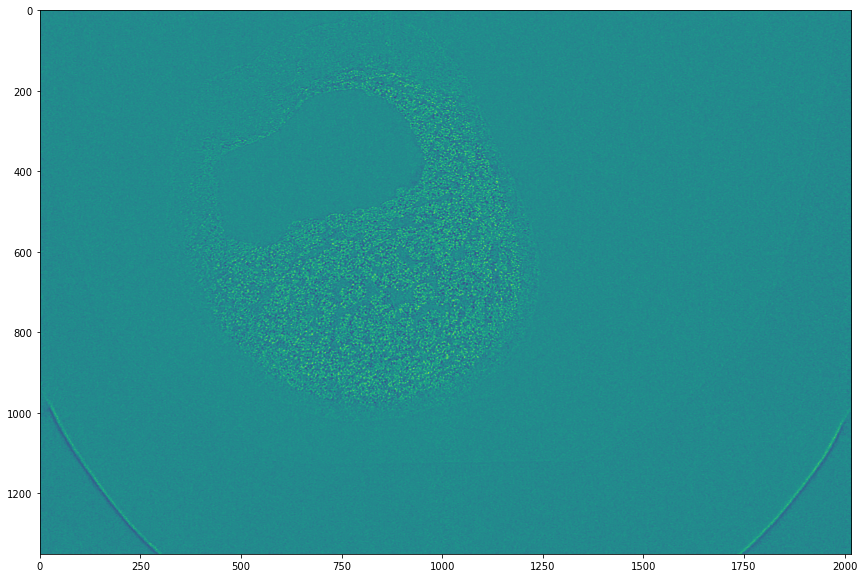

In [17]:
plt.figure(figsize=(16, 10))
plt.imshow(after[:, 1000])

## Best validation inference on valid

In [59]:
from skimage.segmentation import mark_boundaries

In [61]:
before = tifffile.imread('/mnt/data/denoising/xeno/reco/all_volumes/15.tif')
after = tifffile.imread('/mnt/data/denoising/xeno/reco/all_volumes_processed/15.tif')

IndexError: list index out of range

In [ ]:
i=300
s = 250
p_x, p_y = 1000, 1200

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 10))
segment = np.zeros(before[i].shape, dtype=np.uint8)
segment[p_y:p_y+s, p_x:p_x+s] = 1

ax1.imshow(mark_boundaries((before[i]+1)/2, segment))
ax2.imshow(mark_boundaries((after[i]+1)/2, segment))
plt.show()

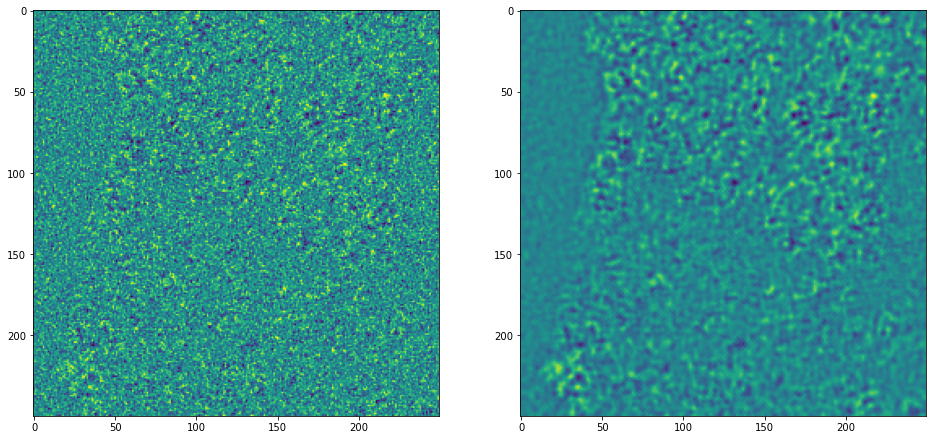

In [57]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 10))
ax1.imshow(before[i][p_y:p_y+s, p_x:p_x+s])
ax2.imshow(after[i][p_y:p_y+s, p_x:p_x+s])
plt.show()

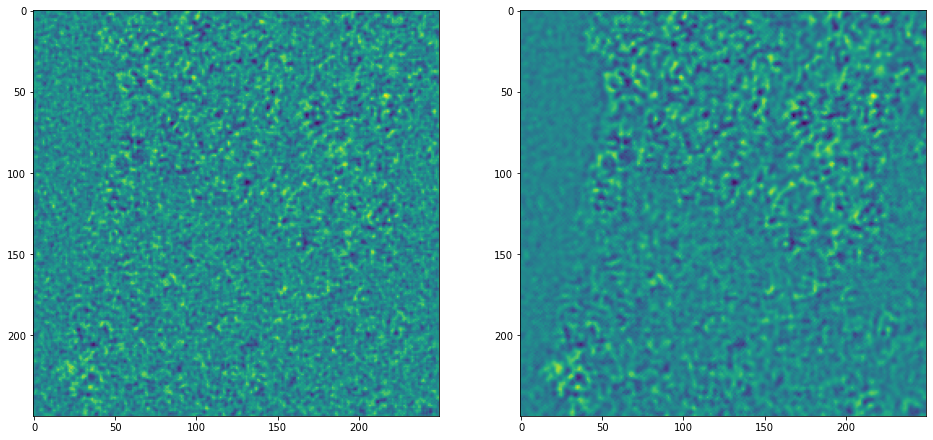

In [58]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 10))
ax1.imshow(convolve2d(before[i][p_y:p_y+s, p_x:p_x+s], mask, mode='same'))
ax2.imshow(after[i][p_y:p_y+s, p_x:p_x+s])
plt.show()

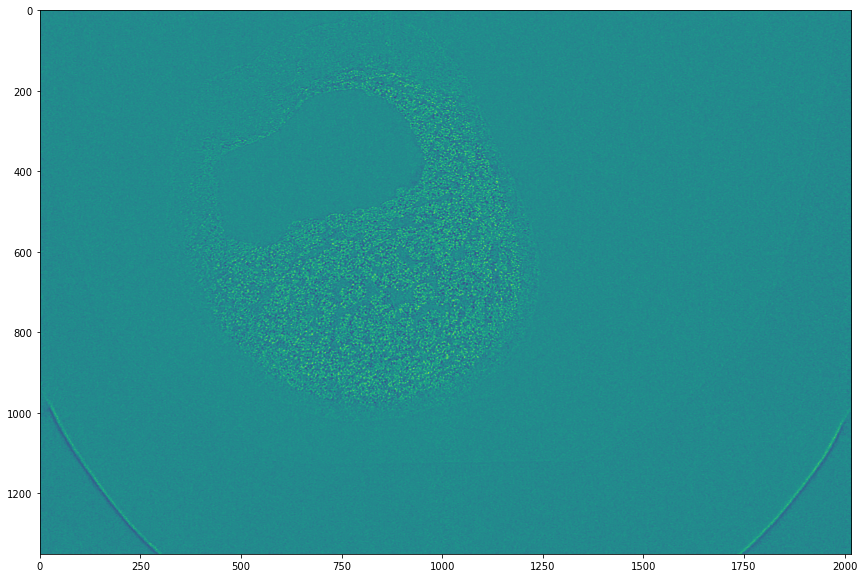

In [17]:
plt.figure(figsize=(16, 10))
plt.imshow(after[:, 1000])

In [23]:
ff = tifffile.imread('/mnt/HD-LSDF/Xenopus/2021_11_Xenopus/Vergleichsmessungen_NN/Xenopus_13_3p125_ms_exp_750_proj/flats/frame_000000.tif')

In [29]:
dd = tifffile.imread('/mnt/HD-LSDF/Xenopus/2021_11_Xenopus/Vergleichsmessungen_NN/Xenopus_13_3p125_ms_exp_750_proj/darks/frame_000000.tif')

In [24]:
vv = tifffile.imread('/mnt/HD-LSDF/Xenopus/2021_11_Xenopus/Vergleichsmessungen_NN/Xenopus_13_3p125_ms_exp_750_proj/radios/frame_000001.tif')

In [30]:
ff.shape, vv.shape, dd.shape

((200, 2016, 2016), (223, 2016, 2016), (200, 2016, 2016))

In [118]:
def correct_image(r, f, d):
    return (r - d) / (f - d)

In [42]:
from tqdm.auto import tqdm

In [119]:
img_corrs = []
for i in tqdm(range(200)):
    img_corrs.append(correct_image(vv[0].astype(np.float32), ff[i].astype(np.float32), dd[i].astype(np.float32)))
img = np.stack(img_corrs).mean(0)

  0%|          | 0/200 [00:00<?, ?it/s]

In [123]:
o_corr = correct_image(vv[0].astype(np.float32), 
                       ff.astype(np.float32).mean(0), 
                       dd.astype(np.float32).mean(0))

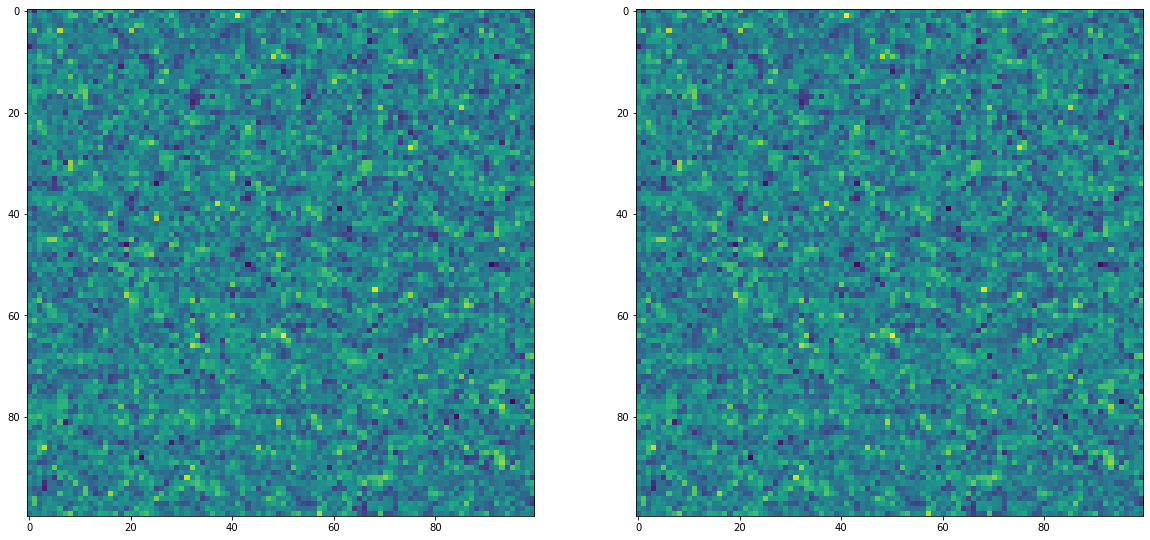

In [107]:
fig, (ax1, ax2) = plt.subplots(figsize=(20, 10), ncols=2)

ax1.imshow(img[1000:1100, 750:850])
ax2.imshow(o_corr[1000:1100, 750:850])
plt.show()

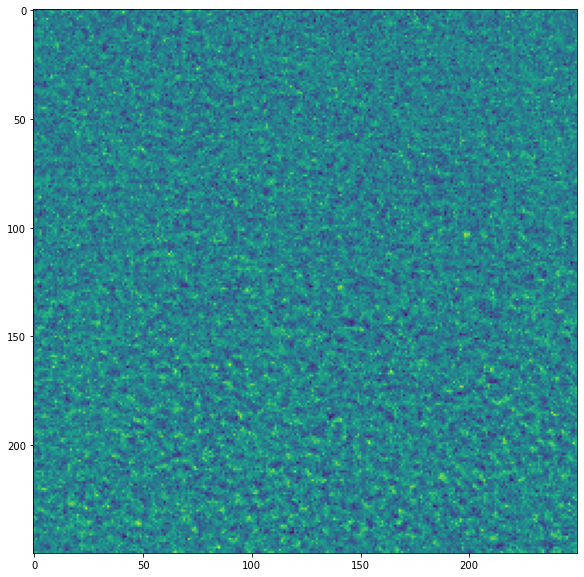

In [100]:
plt.figure(figsize=(16, 10))
plt.imshow(img[1000:1250, 750:1000])
plt.show()

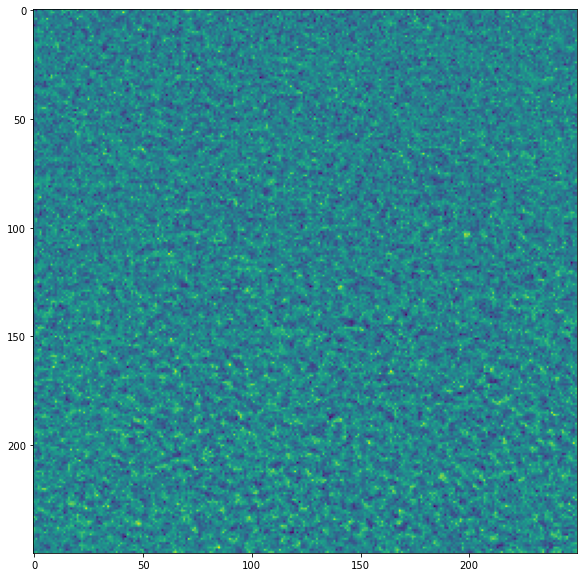

In [102]:
plt.figure(figsize=(16, 10))
plt.imshow()
plt.show()

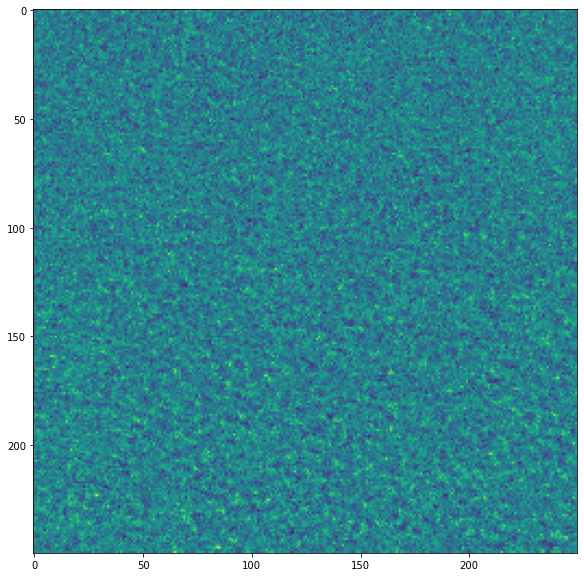

In [101]:
plt.figure(figsize=(10, 10))
plt.imshow(img_corrs[0][1000:1250, 750:1000])

In [120]:
img_corrs_arr = np.stack(img_corrs)

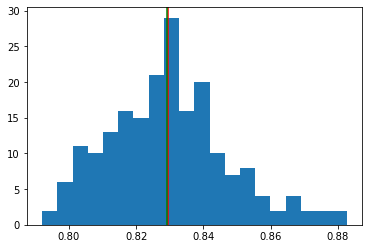

In [124]:
plt.hist(img_corrs_arr[:, 1100, 800], bins=20)
plt.axvline(img_corrs_arr[:, 1100, 800].mean(), c='r')
plt.axvline(o_corr[1100, 800], c='g')

In [93]:
img_corrs_arr.shape

(200, 2016, 2016)

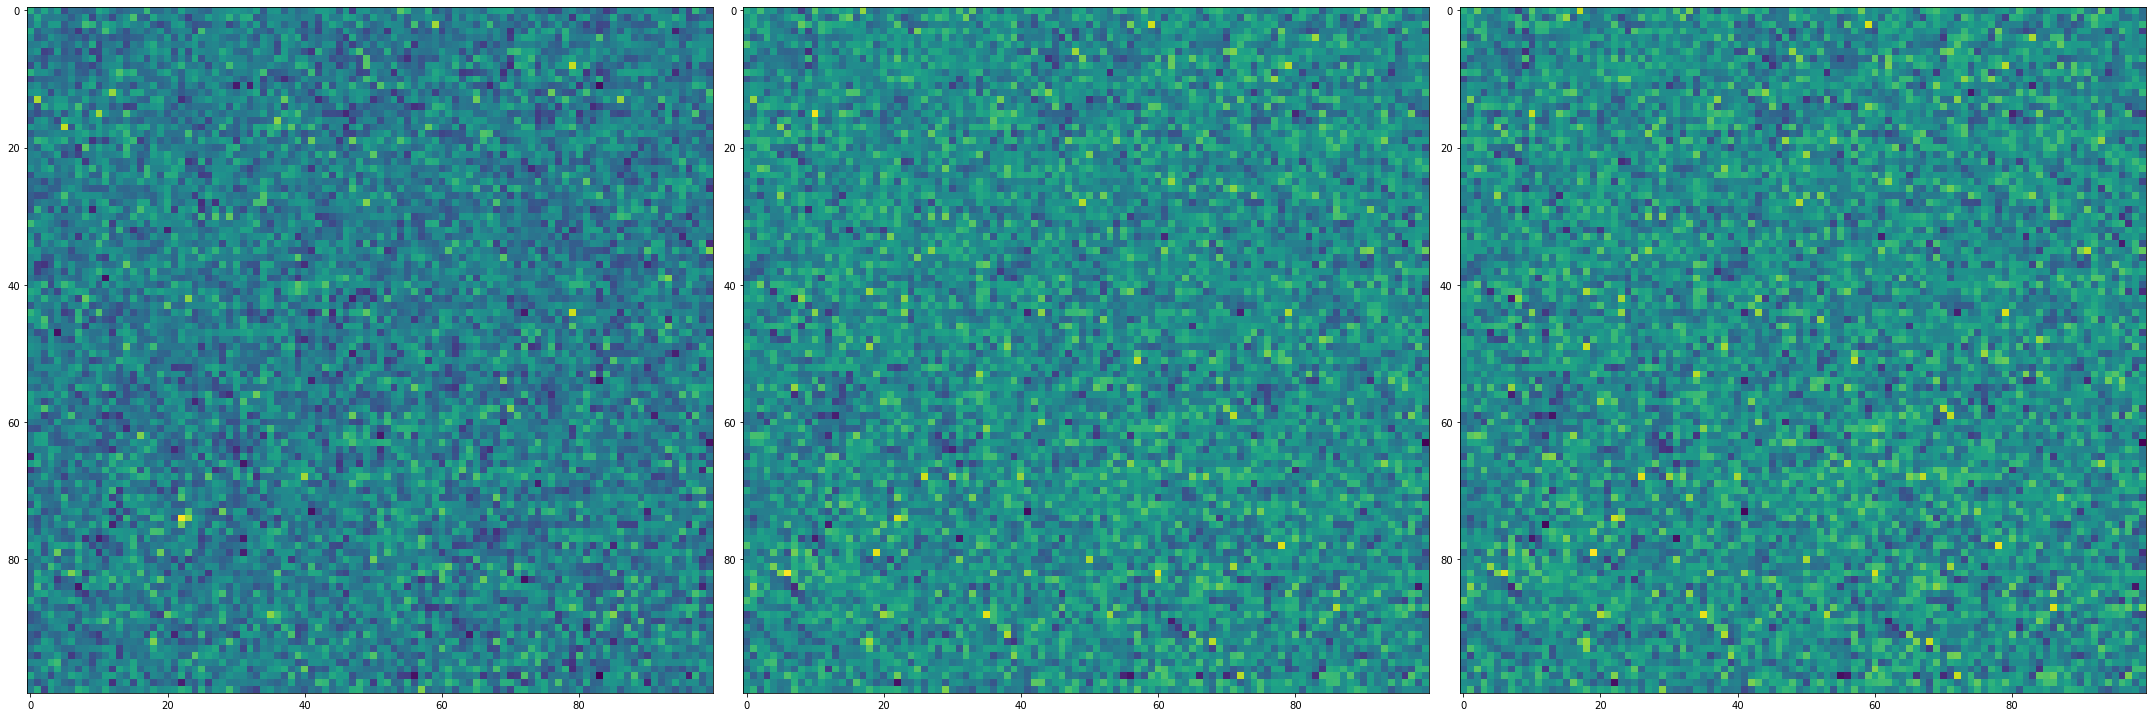

In [95]:
fig, (ax1, ax2, ax3)= plt.subplots(ncols=3, figsize=(30, 10))

ax1.imshow(img_corrs_arr[0][1800:1900, 800:900])
ax2.imshow(img_corrs_arr[:10].mean(0)[1800:1900, 800:900])
ax3.imshow(img_corrs_arr[:100].mean(0)[1800:1900, 800:900])

plt.tight_layout()

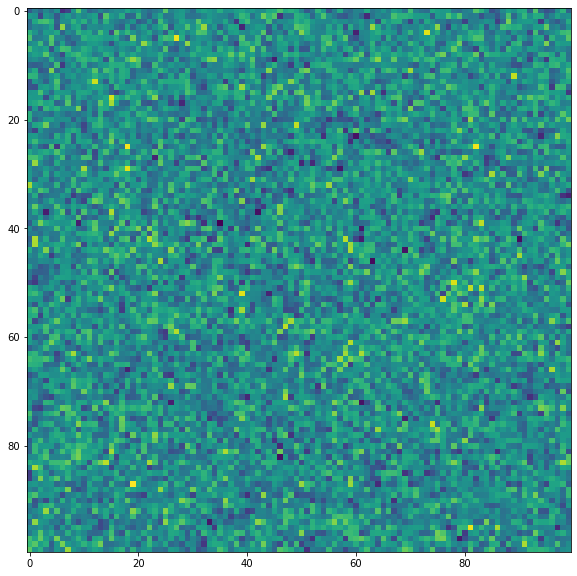

In [91]:
plt.figure(figsize=(10,10))
plt.imshow(img_corrs_arr[:10].mean(0)[1000:1100, 800:900] - img_corrs_arr[:100].mean(0)[1000:1100, 800:900])

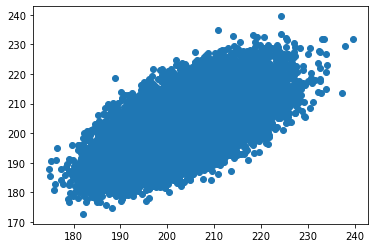

In [75]:
plt.scatter(img_corrs[0][1000:1250, 750:1000].flatten(), img_corrs[3][1000:1250, 750:1000].flatten())

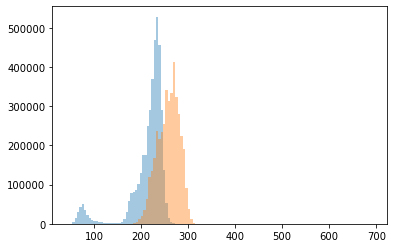

In [26]:
plt.hist(vv[0].flatten(), bins=100, alpha=0.4);
plt.hist(ff[0].flatten(), bins=100, alpha=0.4);

In [16]:
import numpy as np

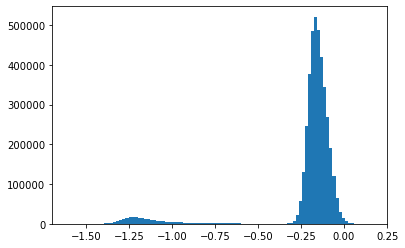

In [27]:
plt.hist((np.log(vv[0]) - np.log(ff[0])).flatten(), bins=100);

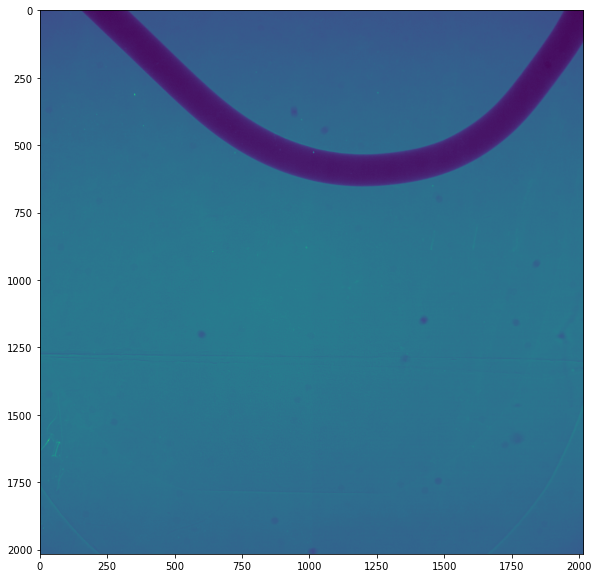

In [28]:
plt.figure(figsize=(10, 10))
plt.imshow(vv[0])